In [126]:
import pandas as pd
import random
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

In [127]:
# Load the dataset
df = pd.read_csv('data/Children_data.csv')

# Display the first few rows to understand the data
df.head()

,Name,Age,Gender,Grade,Health Condition,Favorite Hobby,Favorite Subject,Favorite Food,Family Activity
0,Aarav,8,Male,3,NaN,Painting,Science,Pizza,Gardening together
1,Ishika,10,Female,5,Asthma,Reading,Mathematics,Chocolate,Family movie night
2,Kabir,7,Male,2,NaN,Soccer,Art,Pasta,Sunday picnics
3,Diya,6,Female,1,Allergies,Dancing,Music,Ice Cream,Baking cookies together
4,Yuvraj,9,Male,4,NaN,Cycling,History,Burgers,Board game evenings


In [128]:
# Remove irrelevant columns (if any)
df = df[['Name', 'Age', 'Gender', 'Grade', 'Health Condition', 'Favorite Hobby', 'Favorite Subject', 'Favorite Food', 'Family Activity']]

In [129]:
# Select a sentence from the "Hobbies" column
sample_sentence = df['Favorite Hobby'].iloc[0]  # Taking the first sentence as an example

print("Sample Sentence from Dataset:")
print(sample_sentence)

Sample Sentence from Dataset:
Painting


In [130]:
# Randomly select values for the sentence
random_row = random.choice(df.index)
name = df.loc[random_row, 'Name']
age = df.loc[random_row, 'Age']
gender = df.loc[random_row, 'Gender']
grade = df.loc[random_row, 'Grade']
hobby = df.loc[random_row, 'Favorite Hobby']
subject = df.loc[random_row, 'Favorite Subject']
food = df.loc[random_row, 'Favorite Food']
activity = df.loc[random_row, 'Family Activity']

# Create a sentence
sentence = f"{name} is a {age}-year-old {gender.lower()} in grade {grade}. " \
           f"Their favorite hobby is {hobby.lower()}, and they love studying {subject.lower()}. " \
           f"They enjoy eating {food.lower()} and spending time with family, especially {activity.lower()}."

print("Generated Sentence:")
print(sentence)

Generated Sentence:
Arnav is a 10-year-old male in grade 5. Their favorite hobby is soccer, and they love studying physics. They enjoy eating chocolate and spending time with family, especially family game nights.


In [131]:
import nltk

# Download the necessary data files
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahakaal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahakaal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [132]:
import nltk
import string
import matplotlib.pyplot as plt

# Ensure that the necessary data files are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Sample sentence
sample_sentence = "Aarav is a 11-year-old female in grade 6. Their favorite hobby is cooking, and they love studying physics. They enjoy eating ice cream and spending time with family, especially family talent shows."


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahakaal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mahakaal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [133]:
# Tokenize the sample sentence using NLTK
tokens = nltk.word_tokenize(sample_sentence)

# Define stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))

In [134]:
# Filter stopwords
filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

# Count the frequency of each token
token_counts = {}
for token in filtered_tokens:
    token_counts[token] = token_counts.get(token, 0) + 1

In [135]:
# Sort the tokens by frequency
sorted_tokens = sorted(token_counts.items(), key=lambda x: x[1], reverse=True)

# Prepare data for visualization
labels = [token[0] for token in sorted_tokens]
values = [token[1] for token in sorted_tokens]

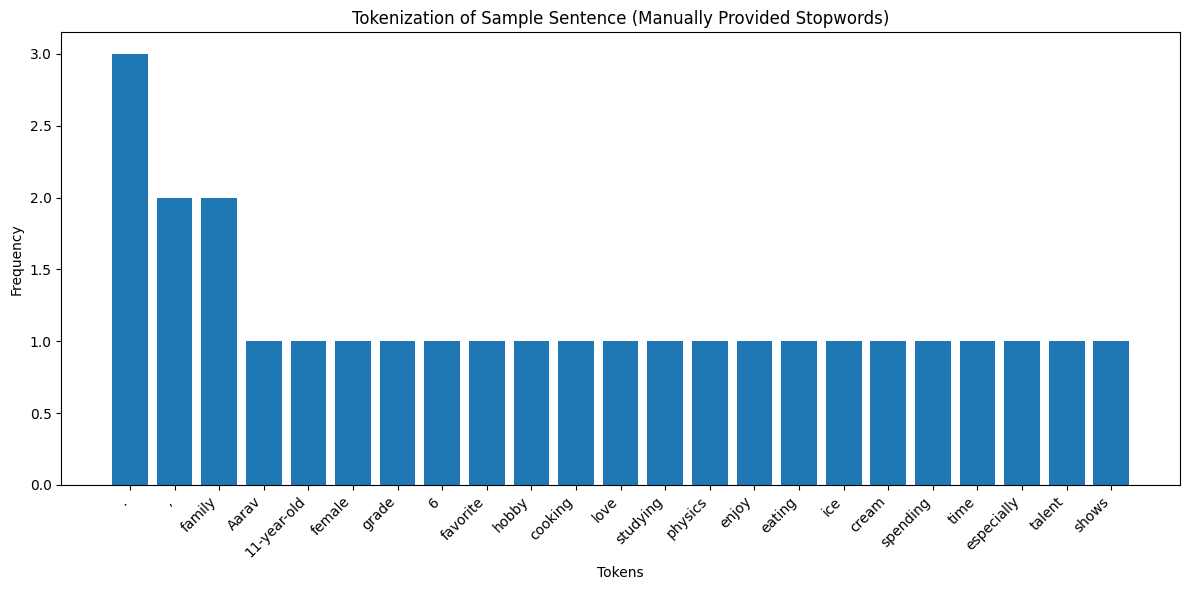

In [136]:
# Plotting the tokens
plt.figure(figsize=(12, 6))
plt.bar(range(len(values)), values, tick_label=labels)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Tokenization of Sample Sentence (Manually Provided Stopwords)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [137]:
# Load tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [138]:
# Fine-tuning hyper-parameters
learning_rate = 1e-5
batch_size = 32
warmup = 600
max_seq_length = 128
num_train_epochs = 3.0

In [139]:
import torch
from transformers import DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
max_seq_length = 128  # Set your desired maximum sequence length

# Example label_to_id dictionaries for each category
age_to_id = {
    "0-3": 0,
    "4-7": 1,
    "8-12": 2,
    "13-18": 3
}

gender_to_id = {
    "male": 0,
    "female": 1
}

food_to_id = {
    "pizza": 0,
    "burger": 1,
    "salad": 2,
    "pasta": 3
}

activity_to_id = {
    "drawing": 0,
    "reading": 1,
    "playing sports": 2,
    "cooking": 3,
    "gardening": 4
    # Add more activities and corresponding labels as needed
}

In [140]:
def prepare_data_for_distilbert(df, category, label_to_id):
    sentences = df[category].values.tolist()
    labels = [label_to_id[label] for label in sentences if label in label_to_id]
    
    # Check if sentences list is empty
    if not sentences:
        return None, None
    
    inputs = tokenizer(sentences, return_tensors="pt", truncation=True, padding=True, max_length=max_seq_length)
    labels = torch.tensor(labels)
    
    return inputs, labels


In [141]:
# Example usage:
filtered_df = df[df['Age'].isin(age_to_id.keys())]
age_inputs, age_labels = prepare_data_for_distilbert(filtered_df, 'Age', age_to_id)

filtered_df = df[df['Gender'].isin(gender_to_id.keys())]
gender_inputs, gender_labels = prepare_data_for_distilbert(filtered_df, 'Gender', gender_to_id)

filtered_df = df[df['Favorite Food'].isin(food_to_id.keys())]
food_inputs, food_labels = prepare_data_for_distilbert(filtered_df, 'Favorite Food', food_to_id)

filtered_df = df[df['Family Activity'].isin(activity_to_id.keys())]
activity_inputs, activity_labels = prepare_data_for_distilbert(filtered_df, 'Family Activity', activity_to_id)

In [142]:
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)
model.train()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [143]:
# Example usage for training loop
category = 'Age'  # Change this to the category you want to predict
label_to_id = age_to_id  # Change this to the corresponding label_to_id dictionary

for epoch in range(int(num_train_epochs)):
    for i in range(0, len(filtered_df), batch_size):
        # Prepare data for the current batch
        batch_df = filtered_df[i:i+batch_size]
        batch_inputs, batch_labels = prepare_data_for_distilbert(batch_df, category, label_to_id)
        
        if batch_inputs is not None and batch_labels is not None:
            # Ensure all necessary keys are present in the inputs dictionary
            if 'input_ids' not in batch_inputs:
                batch_inputs = {k: v for k, v in batch_inputs.items() if v is not None}
            
            # Perform training for this batch
            optimizer.zero_grad()
            outputs = model(**batch_inputs, labels=batch_labels)

In [144]:
# Save the fine-tuned model
model.save_pretrained("fine_tuned_model")

In [145]:
# Load the fine-tuned model
model = DistilBertForSequenceClassification.from_pretrained("fine_tuned_model")

In [146]:
def predict_child_details(query):
    # Extract the name and detail from the query
    name = query.split()[-1].strip("?")
    detail = query.split()[-3].lower()
    
    # Search for the name in the dataset
    row = df[df['Name'] == name]
    
    if len(row) == 0:
        print(f"No row found for {name}.")
        return "Child not found"
    
    if detail == "favorite food":
        return row['Favorite Food'].iloc[0]
    elif detail == "age":
        return row['Age'].iloc[0]
    elif detail == "gender":
        return row['Gender'].iloc[0]
    elif detail == "grade":
        return row['Grade'].iloc[0]
    elif detail == "health condition":
        return row['Health Condition'].iloc[0]
    elif detail == "favorite hobby":
        return row['Favorite Hobby'].iloc[0]
    elif detail == "favorite subject":
        return row['Favorite Subject'].iloc[0]
    elif detail == "family activity":
        return row['Family Activity'].iloc[0]
    else:
        print(f"Invalid detail '{detail}'.")
        return "Invalid detail"

In [147]:
def predict_child_details(query):
    # Extract the name from the query
    name = query.split()[-1].strip("?")
    
    # Search for the name in the dataset
    row = df[df['Name'] == name]
    
    if len(row) == 0:
        print(f"No row found for {name}.")
        return "Child not found"
    
    details = {}
    details['Name'] = row['Name'].iloc[0]
    details['Age'] = row['Age'].iloc[0]
    details['Gender'] = row['Gender'].iloc[0]
    details['Grade'] = row['Grade'].iloc[0]
    details['Health Condition'] = row['Health Condition'].iloc[0]
    details['Favorite Hobby'] = row['Favorite Hobby'].iloc[0]
    details['Favorite Subject'] = row['Favorite Subject'].iloc[0]
    details['Favorite Food'] = row['Favorite Food'].iloc[0]
    details['Family Activity'] = row['Family Activity'].iloc[0]
    
    return details

In [148]:
query = "What is the gender of Aarav?"
predicted_gender = predict_child_details(query)
print("Predicted Gender:", predicted_gender)

Predicted Gender: {'Name': 'Aarav', 'Age': 8, 'Gender': 'Male', 'Grade': 3, 'Health Condition': nan, 'Favorite Hobby': 'Painting', 'Favorite Subject': 'Science', 'Favorite Food': 'Pizza', 'Family Activity': 'Gardening together'}


In [149]:
query = "What is the favorite subject of Kabir?"
predicted_subject = predict_child_details(query)
print("Predicted Favorite Subject:", predicted_subject)

Predicted Favorite Subject: {'Name': 'Kabir', 'Age': 7, 'Gender': 'Male', 'Grade': 2, 'Health Condition': nan, 'Favorite Hobby': 'Soccer', 'Favorite Subject': 'Art', 'Favorite Food': 'Pasta', 'Family Activity': 'Sunday picnics'}


In [150]:
query = "What is the family activity of Diya?"
predicted_activity = predict_child_details(query)
print("Predicted Family Activity:", predicted_activity['Family Activity'])

Predicted Family Activity: Baking cookies together


In [151]:
query = "How many females are there?"
count = len(df[df['Gender'] == 'Female'])
print(f"Predicted Count: {count}")

Predicted Count: 101
